In [74]:
import warnings
warnings.filterwarnings('ignore')

#### References

Adaboost \
[1] https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50 \
[2] https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html \
[3] https://www.youtube.com/watch?v=LsK-xG1cLYA \
[4] http://mccormickml.com/2013/12/13/adaboost-tutorial/ 

Bagging \
[1] https://dafriedman97.github.io/mlbook/content/c6/s2/bagging.html \
[2] https://insidelearningmachines.com/build-a-bagging-classifier-in-python/ \
[3] https://www.youtube.com/watch?v=Xz0x-8-cgaQ

## Importing the necessary libraries

In [75]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Reading the data in

All datasets are read in and given a uniform format. The numerical column names are changed to string-based names. Numerical columns names can get confusing, especially when using dataframe slicing. So, changing column names accordingly. All label columns are placed at the start of the dataframes, and all labels are changed to either -1 or 1.

### Letters

In [76]:
column_names = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']

In [77]:
letters = pd.read_csv('letter-recognition.data', delimiter = ',', names = column_names, header = None)

letters_C = letters[letters['Y'] == 'C']
letters_G = letters[letters['Y'] == 'G']
letters_CG = pd.concat((letters_C, letters_G), ignore_index = True)
letters_CG = shuffle(letters_CG, random_state = 1)

labels = dict(zip(set(letters_CG['Y']), {-1, 1}))                # Keeping the labels as -1 and 1
letters_CG['Y'] = letters_CG['Y'].map(labels, na_action = 'ignore')
letters_CG.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
572,1,3,3,4,5,2,6,6,7,9,9,5,13,1,9,4,8
983,-1,3,7,5,5,5,9,7,6,2,6,7,9,5,8,3,8
782,-1,3,9,5,6,3,6,7,7,6,5,7,9,2,7,4,9
536,1,5,8,5,6,4,6,7,6,6,12,8,11,2,11,4,7
1143,-1,4,5,5,4,3,6,6,6,7,6,6,11,2,9,4,9


In [78]:
ncols1 = letters_CG.shape[1]                # For use later in the code

#### Splitting into training and testing

In [79]:
# Use with shallow trees

train_data_11, test_data_11 = train_test_split(letters_CG, shuffle = True, stratify = letters_CG['Y'], train_size = 500)
train_data_11.reset_index(drop = True, inplace = True)
test_data_11.reset_index(drop = True, inplace = True)

In [80]:
# Use with deeper trees

train_data_12, test_data_12 = train_test_split(letters_CG, shuffle = True, stratify = letters_CG['Y'], train_size = 500)
train_data_12.reset_index(drop = True, inplace = True)
test_data_12.reset_index(drop = True, inplace = True)

### Credit

In [81]:
column_names = ['X1', 'X2', 'X3', 'X4', 'X5', 
                'X6', 'X7', 'X8', 'X9', 'X10', 
                'X11', 'X12', 'X13', 'X14', 'X15', 
                'X16', 'X17', 'X18', 'X19', 'X20', 'Y']

In [82]:
credit = pd.read_csv('german.data', sep = '\s+', names = column_names, header = None)
credit = credit[['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20']]

labels = dict(zip(set(credit['Y']), {-1, 1}))
credit['Y'] = credit['Y'].map(labels, na_action = 'ignore')

for i in credit.columns:
    if credit[i].dtype == 'object':
        labels = dict(zip(set(credit[i]), range(len(set(credit[i])))))
        credit[i] = credit[i].map(labels, na_action = 'ignore')

credit.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,1,2,6,1,5,1169,1,0,4,2,...,4,2,67,2,1,2,0,1,0,1
1,-1,3,48,0,5,5951,3,4,2,3,...,2,2,22,2,1,1,0,1,1,1
2,1,0,12,1,0,2096,3,2,2,2,...,3,2,49,2,1,1,3,2,1,1
3,1,2,42,0,4,7882,3,2,2,2,...,4,3,45,2,0,1,0,2,1,1
4,-1,2,24,4,7,4870,3,4,3,2,...,4,1,53,2,0,2,0,2,1,1


In [83]:
ncols2 = credit.shape[1]

#### Splitting into training and testing

In [84]:
train_data_21, test_data_21 = train_test_split(credit, shuffle = True, stratify = credit['Y'], train_size = 400)
train_data_21.reset_index(drop = True, inplace = True)
test_data_21.reset_index(drop = True, inplace = True)

In [85]:
train_data_22, test_data_22 = train_test_split(credit, shuffle = True, stratify = credit['Y'], train_size = 400)
train_data_22.reset_index(drop = True, inplace = True)
test_data_22.reset_index(drop = True, inplace = True)

### Spam

In [86]:
column_names = []
for i in range(57):
    cn = 'X' + str(i+1)
    column_names.append(cn)
column_names.append('Y')

spam = pd.read_csv('spambase.data', delimiter = ',', names = column_names, header = None)

column_names = ['Y']
for i in range(57):
    cn = 'X' + str(i+1)
    column_names.append(cn)
spam = spam[column_names]

labels = dict(zip(set(spam['Y']), {-1, 1}))
spam['Y'] = spam['Y'].map(labels, na_action = 'ignore')

spam.sample(n = 5)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
4286,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.679,0.000,0.000,0.000,0.0,1.636,6,72
1513,-1,0.00,0.00,0.00,0.0,1.52,0.00,2.29,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,3.850,19,77
3466,1,0.26,0.26,0.00,0.0,0.52,0.26,0.00,0.52,0.00,...,0.0,0.065,0.000,0.032,0.000,0.000,0.0,1.455,12,115
59,-1,0.00,0.42,1.68,0.0,0.42,0.00,0.00,0.00,0.00,...,0.0,0.000,0.066,0.000,0.669,0.000,0.0,3.837,121,284
2940,1,0.05,0.00,0.45,0.0,0.15,0.10,0.00,0.00,0.55,...,0.0,0.203,0.195,0.050,0.000,0.014,0.0,2.880,45,1080


In [87]:
ncols3 = spam.shape[1]

#### Splitting into training and testing

In [88]:
train_data_31, test_data_31 = train_test_split(spam, shuffle = True, stratify = spam['Y'], train_size = 1000)
train_data_31.reset_index(drop = True, inplace = True)
test_data_31.reset_index(drop = True, inplace = True)

In [89]:
train_data_32, test_data_32 = train_test_split(spam, shuffle = True, stratify = spam['Y'], train_size = 1000)
train_data_32.reset_index(drop = True, inplace = True)
test_data_32.reset_index(drop = True, inplace = True)

## Helper functions for AdaBoost

In [90]:
# Calculating fraction of incorrectly classified samples by the weak classifier

def error_calc(y, y_pred):
    return  sum(np.not_equal(y, y_pred).astype(int)) / len(y)

In [91]:
# Calculating alpha values to update weights based on the errors

def alpha_calc(error):
    return np.round(0.5 * np.log((1 - error) / (error)), 3)

In [92]:
# Updating weights by increasing the weight for the incorrectly classified sample and decreasing the weight for correctly classified sample

def update_weight(weight, alpha, y, y_pred):
    new_weights = weight * np.exp(-1 * alpha * y * y_pred)
    return new_weights / sum(new_weights)               # Normalizing the weights   

In [93]:
# Create a new data of the same size as the training data based on the weights of each sample (samples can be repeated)

def update_data(data):
    probs = list(data['weights'])
    # samples with large weights have greater chanceof being picked
    index_vals = np.random.choice(a = range(data.shape[0]), size = data.shape[0], replace = True, p = probs)
    return index_vals

## Implementing the AdaBoost algorithm

In [94]:
def create_boost(train_data, test_data, ncols, n_trees = 50, shallow = True, depth = 10):
    models = []
    train_errors = []
    test_errors = []
    alphas = []
    for i in range(n_trees):            # maximum number of weak classifiers to consider
        train_data['weights'] = np.ones(train_data.shape[0]) / train_data.shape[0]             # initially all samples have the same weights
        if shallow == True:
            base_clf = DecisionTreeClassifier(max_depth = 1)            # shallow by default
        else:
            base_clf = DecisionTreeClassifier(max_depth = depth)
        base_clf.fit(train_data.iloc[:, 1:ncols], train_data.iloc[:, 0])                # fitting the weak classifier
        # making weak predictions
        train_data['pred'] = base_clf.predict(train_data.iloc[:, 1:ncols])
        train_error = error_calc(train_data.iloc[:, 0], train_data['pred'])
        test_pred = base_clf.predict(test_data.iloc[:, 1:ncols])
        test_error = error_calc(test_data.iloc[:, 0], test_pred)
        if train_error == 0:
            print('Train error has reached 0, stopping after ' + str(i+1) + ' iterations.')
            models.append(base_clf)
            alpha = 2
            alphas.append(alpha)
            train_errors.append(train_error)
            test_errors.append(test_error)
            break
        models.append(base_clf)
        alpha = alpha_calc(train_error)
        alphas.append(alpha)
        train_errors.append(train_error)
        test_errors.append(test_error)
        train_data['weights'] = update_weight(train_data['weights'], alpha, train_data.iloc[:, 0], train_data['pred'])                  # updating the weights
        new_index = update_data(train_data)                 # generating the updated data sample
        train_data = train_data.iloc[new_index, :ncols]
    fit_vals = pd.DataFrame(list(zip(models, alphas, train_errors, test_errors)), columns = ['Models', 'Alphas', 'Train Error', 'Test Fit Error'])
    return fit_vals

## Prediction function

In [95]:
def predict_boost(data, fit_vals, ncols):
        weak_predictions = pd.DataFrame(index = range(data.shape[0]), columns = range(fit_vals.shape[0]))
        for i in range(fit_vals.shape[0]):              # predicting using each weak classifier
            weak_model_pred = fit_vals['Models'][i].predict(data.iloc[:, 1:ncols]) * fit_vals['Alphas'][i]              # weighted predictions
            weak_predictions.iloc[:, i] = weak_model_pred
        pred = (1 * np.sign(weak_predictions.T.sum())).astype(int)              # adding all weak predictions and using signum function to predict final output
        return pred

## Evaluating performance

### Decision stump and letter data

In [96]:
boost_vals_11 = create_boost(train_data_11, test_data_11, ncols1, 50, True)          # fitting the classifier

In [97]:
# Final predictions on training data

train_pred_11 = predict_boost(train_data_11, boost_vals_11, ncols1)
print('Accuracy on training data: ' + str(sum(list(train_pred_11 == train_data_11['Y'])) / len(train_data_11['Y'])))

Accuracy on training data: 0.926


In [98]:
# Final predicitions on test data

final_pred_11 = predict_boost(test_data_11, boost_vals_11, ncols1)
print('Accuracy on test data: ' + str(sum(list(final_pred_11 == test_data_11['Y'])) / len(test_data_11['Y'])))

Accuracy on test data: 0.9098116947472745


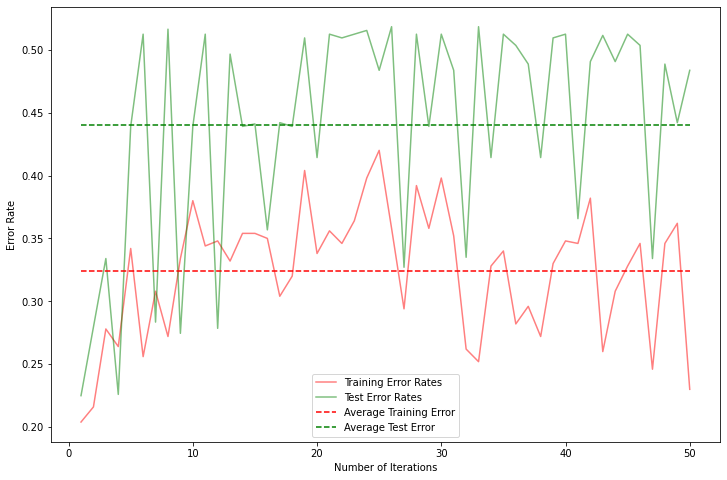

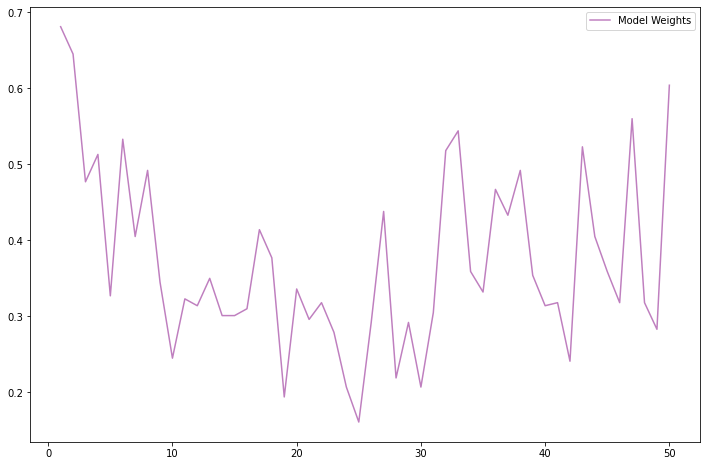

In [99]:
# plotting the error across all weak classifiers

avg_train_error = [sum(boost_vals_11['Train Error']) / boost_vals_11.shape[0]] * boost_vals_11.shape[0]
avg_test_error = [sum(boost_vals_11['Test Fit Error']) / boost_vals_11.shape[0]] * boost_vals_11.shape[0]

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_11.shape[0] + 1)), boost_vals_11['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_11.shape[0] + 1)), boost_vals_11['Test Fit Error'], color = 'green', label = 'Test Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_11.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, boost_vals_11.shape[0] + 1)), avg_test_error, 'g--', label = 'Average Test Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


# Viewing the nodel weights

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_11.shape[0] + 1)), boost_vals_11['Alphas'], color = 'purple', label = 'Model Weights', alpha = 0.5)
plt.legend()
plt.show()

### Deeper tree and letter data

In [100]:
boost_vals_12 = create_boost(train_data_12, test_data_12, ncols1, 50, False, depth = 5)

Train error has reached 0, stopping after 7 iterations.


In [101]:
train_pred_12 = predict_boost(train_data_12, boost_vals_12, ncols1)
print('Accuracy on training data: ' + str(sum(list(train_pred_12 == train_data_12['Y'])) / len(train_data_12['Y'])))

Accuracy on training data: 0.952


In [102]:
final_pred_12 = predict_boost(test_data_12, boost_vals_12, ncols1)
print('Accuracy on test data: ' + str(sum(list(final_pred_12 == test_data_12['Y'])) / len(test_data_12['Y'])))

Accuracy on test data: 0.9167492566897919


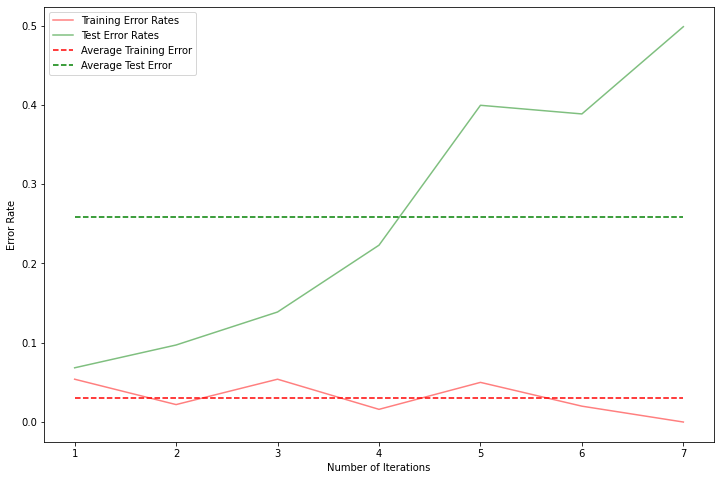

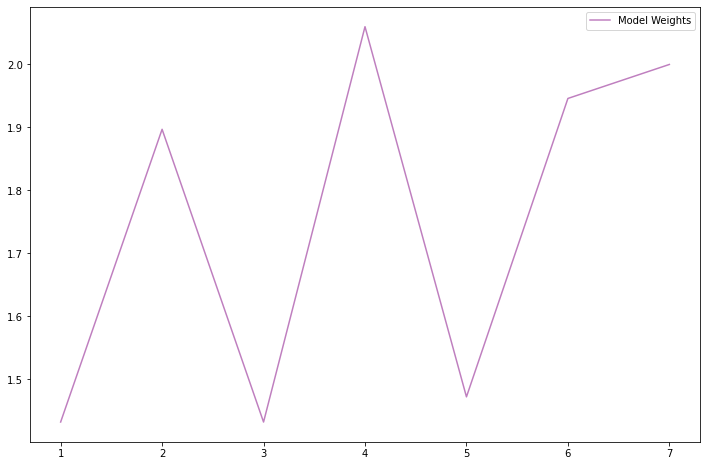

In [103]:
avg_train_error = [sum(boost_vals_12['Train Error']) / boost_vals_12.shape[0]] * boost_vals_12.shape[0]
avg_test_error = [sum(boost_vals_12['Test Fit Error']) / boost_vals_12.shape[0]] * boost_vals_12.shape[0]

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_12.shape[0] + 1)), boost_vals_12['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_12.shape[0] + 1)), boost_vals_12['Test Fit Error'], color = 'green', label = 'Test Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_12.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, boost_vals_12.shape[0] + 1)), avg_test_error, 'g--', label = 'Average Test Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_12.shape[0] + 1)), boost_vals_12['Alphas'], color = 'purple', label = 'Model Weights', alpha = 0.5)
plt.legend()
plt.show()

### Decision stump and credit data

In [104]:
boost_vals_21 = create_boost(train_data_21, test_data_21, ncols2, 50, True)

In [105]:
train_pred_21 = predict_boost(train_data_21, boost_vals_21, ncols2)
print('Accuracy on training data: ' + str(sum(list(train_pred_21 == train_data_21['Y'])) / len(train_data_21['Y'])))

Accuracy on training data: 0.58


In [106]:
final_pred_21 = predict_boost(test_data_21, boost_vals_21, ncols2)
print('Accuracy on test data: ' + str(sum(list(final_pred_21 == test_data_21['Y'])) / len(test_data_21['Y'])))

Accuracy on test data: 0.57


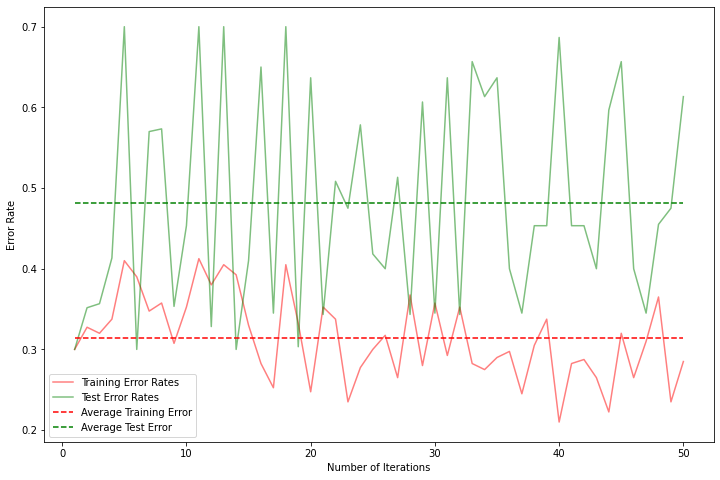

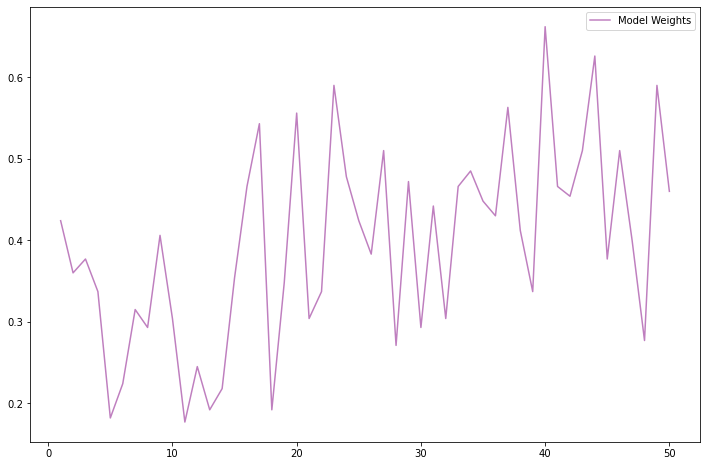

In [107]:
avg_train_error = [sum(boost_vals_21['Train Error']) / boost_vals_21.shape[0]] * boost_vals_21.shape[0]
avg_test_error = [sum(boost_vals_21['Test Fit Error']) / boost_vals_21.shape[0]] * boost_vals_21.shape[0]

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_21.shape[0] + 1)), boost_vals_21['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_21.shape[0] + 1)), boost_vals_21['Test Fit Error'], color = 'green', label = 'Test Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_21.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, boost_vals_21.shape[0] + 1)), avg_test_error, 'g--', label = 'Average Test Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_21.shape[0] + 1)), boost_vals_21['Alphas'], color = 'purple', label = 'Model Weights', alpha = 0.5)
plt.legend()
plt.show()

### Deeper tree and credit data

In [108]:
boost_vals_22 = create_boost(train_data_22, test_data_22, ncols2, 50, False, depth = 8)

Train error has reached 0, stopping after 3 iterations.


In [109]:
train_pred_22 = predict_boost(train_data_22, boost_vals_22, ncols2)
print('Accuracy on training data: ' + str(sum(list(train_pred_22 == train_data_22['Y'])) / len(train_data_22['Y'])))

Accuracy on training data: 0.915


In [110]:
final_pred_22 = predict_boost(test_data_22, boost_vals_22, ncols2)
print('Accuracy on training data: ' + str(sum(list(final_pred_22 == test_data_22['Y'])) / len(test_data_22['Y'])))

Accuracy on training data: 0.675


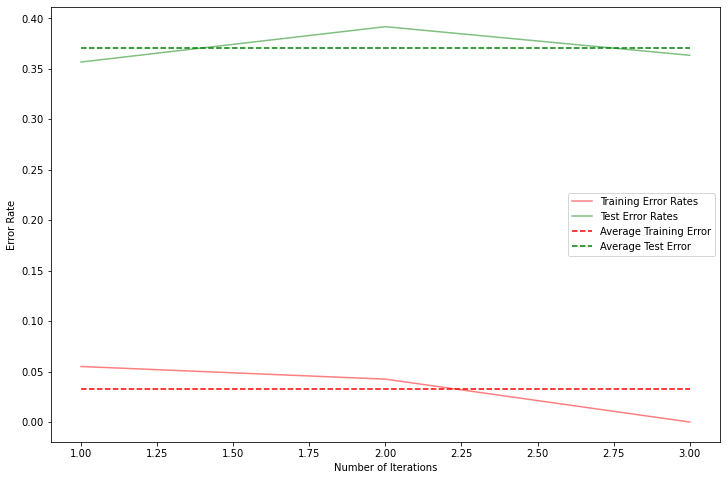

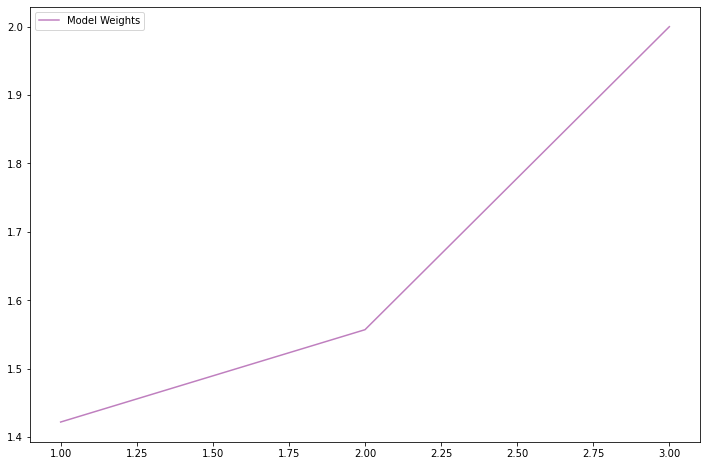

In [111]:
avg_train_error = [sum(boost_vals_22['Train Error']) / boost_vals_22.shape[0]] * boost_vals_22.shape[0]
avg_test_error = [sum(boost_vals_22['Test Fit Error']) / boost_vals_22.shape[0]] * boost_vals_22.shape[0]

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_22.shape[0] + 1)), boost_vals_22['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_22.shape[0] + 1)), boost_vals_22['Test Fit Error'], color = 'green', label = 'Test Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_22.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, boost_vals_22.shape[0] + 1)), avg_test_error, 'g--', label = 'Average Test Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_22.shape[0] + 1)), boost_vals_22['Alphas'], color = 'purple', label = 'Model Weights', alpha = 0.5)
plt.legend()
plt.show()

### Decision stump and spam data

In [112]:
boost_vals_31 = create_boost(train_data_31, test_data_31, ncols3, 100, True)

In [113]:
train_pred_31 = predict_boost(train_data_31, boost_vals_31, ncols3)
print('Accuracy on training data: ' + str(sum(list(train_pred_31 == train_data_31['Y'])) / len(train_data_31['Y'])))

Accuracy on training data: 0.78


In [114]:
final_pred_31 = predict_boost(test_data_31, boost_vals_31, ncols3)
print('Accuracy on test data: ' + str(sum(list(final_pred_31 == test_data_31['Y'])) / len(test_data_31['Y'])))

Accuracy on test data: 0.7728408775340183


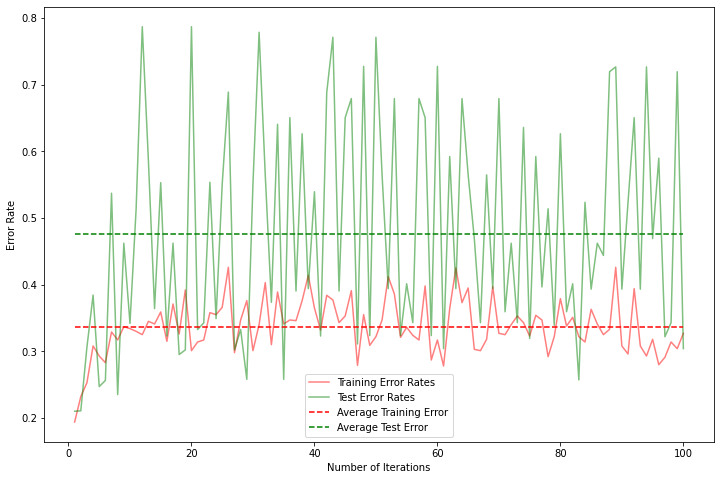

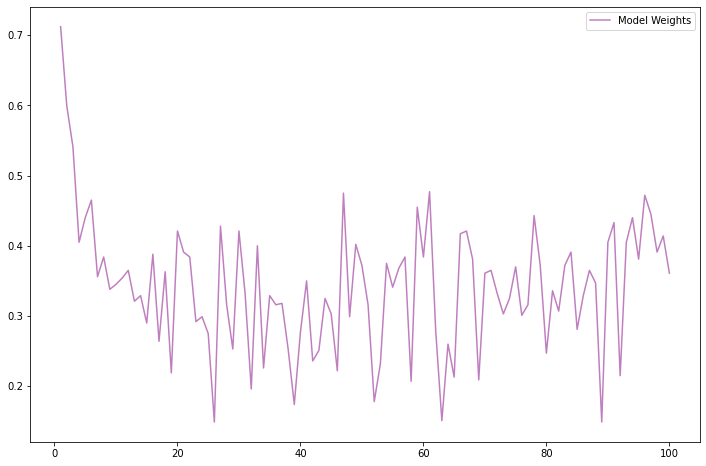

In [115]:
avg_train_error = [sum(boost_vals_31['Train Error']) / boost_vals_31.shape[0]] * boost_vals_31.shape[0]
avg_test_error = [sum(boost_vals_31['Test Fit Error']) / boost_vals_31.shape[0]] * boost_vals_31.shape[0]

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_31.shape[0] + 1)), boost_vals_31['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_31.shape[0] + 1)), boost_vals_31['Test Fit Error'], color = 'green', label = 'Test Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_31.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, boost_vals_31.shape[0] + 1)), avg_test_error, 'g--', label = 'Average Test Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_31.shape[0] + 1)), boost_vals_31['Alphas'], color = 'purple', label = 'Model Weights', alpha = 0.5)
plt.legend()
plt.show()

### Deeper tree and spam data

In [116]:
boost_vals_32 = create_boost(train_data_32, test_data_32, ncols3, 100, False, depth = 10)

Train error has reached 0, stopping after 4 iterations.


In [117]:
train_pred_32 = predict_boost(train_data_32, boost_vals_32, ncols3)
print('Accuracy on training data: ' + str(sum(list(train_pred_32 == train_data_32['Y'])) / len(train_data_32['Y'])))

Accuracy on training data: 0.925


In [118]:
final_pred_32 = predict_boost(test_data_32, boost_vals_32, ncols3)
print('Accuracy on test data: ' + str(sum(list(final_pred_32 == test_data_32['Y'])) / len(test_data_32['Y'])))

Accuracy on test data: 0.8750347125798389


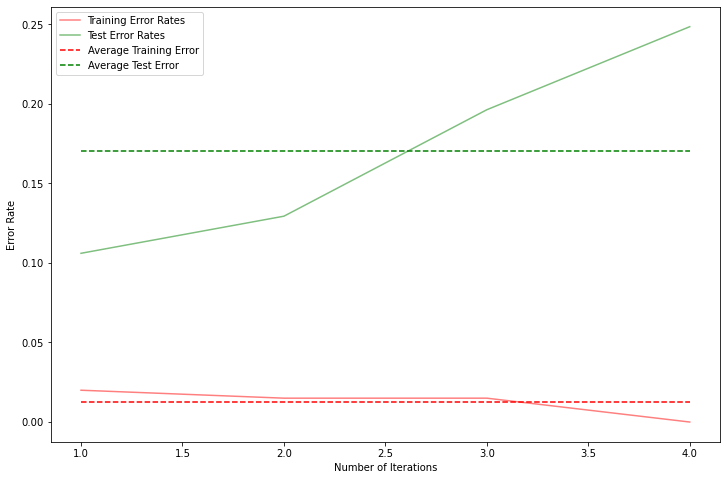

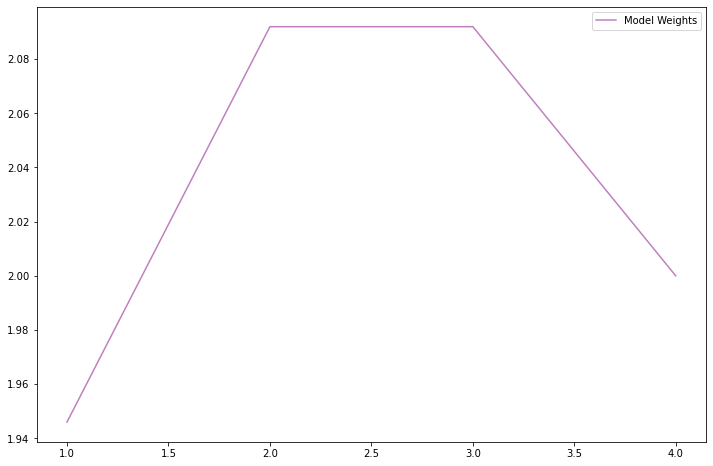

In [119]:
avg_train_error = [sum(boost_vals_32['Train Error']) / boost_vals_32.shape[0]] * boost_vals_32.shape[0]
avg_test_error = [sum(boost_vals_32['Test Fit Error']) / boost_vals_32.shape[0]] * boost_vals_32.shape[0]

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_32.shape[0] + 1)), boost_vals_32['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_32.shape[0] + 1)), boost_vals_32['Test Fit Error'], color = 'green', label = 'Test Error Rates', alpha = 0.5)
plt.plot(list(range(1, boost_vals_32.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, boost_vals_32.shape[0] + 1)), avg_test_error, 'g--', label = 'Average Test Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(list(range(1, boost_vals_32.shape[0] + 1)), boost_vals_32['Alphas'], color = 'purple', label = 'Model Weights', alpha = 0.5)
plt.legend()
plt.show()

## Summary of Experiments on AdaBoost
\
The following experiments were done to evaluate the performance of the AdaBoost classifier:
#
1. The *Letters* dataset with decision stumps:
- The entire dataset was used, with 500 samples used for training and 1009 for testing. 
- A decision stump was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50.
- The average training error is around 0.3.
- The final test accuracy is around 85% <br>
The Adaboost algorithm with stumps works reasonably well on the given data.
#
2. The *Letters* dataset with deeper trees:
- The entire dataset was used, with 500 samples used for training and 1009 for testing.
- A decision tree with a maximum depth of 5 was used as the base classifier.
- The maximum number of base classifiers for the ensemble was set to 50, but the model stopped fitting early because the weights stopped changing (training error rate became 0).
- The average training error is around 0.02.
- The final test accuracy is around 90% <br>
Using deeper trees instead of stumps increases the test accuracy.
#
3. The *Credit* dataset with decision stumps:
- The entire dataset was used, with 400 samples used for training and 600 for testing. 
- A decision stump was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50.
- The average training error ranges between 0.3 and 0.4.
- The best case test accuracy was around 68% and the worst case test accuracy was around 57% <br>
The algorithm does not perform well for this data.<br>More preprocessing and feature engineering may be able to improve these results.
#
4. The *Credit* dataset with deeper trees:
- The entire dataset was used, with 400 samples used for training and 600 for testing. 
- A decision tree with a maximum depth of 8 was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50, but the model stopped fitting early because the weights stopped changing (training error rate became 0).
- The average training error is less than 0.1.
- Similar to decision stumps, the best case test accuracy was around 69% and the worst case test accuracy was around 57% <br>
The algorithm does not perform well for this data. The training accuracy is reasonably hight but the model does not do well when predicting new samples.<br>More preprocessing and feature engineering may be able to improve these results.
#
5. The *Spam* dataset with decision stumps:
- The entire dataset was used, with 1000 samples used for training and 3601 for testing. 
- A decision stump was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50.
- The average training error is around 0.3.
- The final test accuracy is between 78% and 85% <br>
The Adaboost algorithm with stumps works reasonably well on the given data.
#
6. The *Spam* dataset with decision stumps:
- The entire dataset was used, with 1000 samples used for training and 3601 for testing. 
- A decision tree with a maximum depth of 10 was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50, but the model stopped fitting early because the weights stopped changing (training error rate became 0).
- The average training error is around 0.01.
- The final test accuracy ranges between 85% and 91 % depending on the split of the data.<br>
Using deeper trees instead of stumps increases the test accuracy. <br><br>
Except for the credit dataset, the algorithm performs reasonably well, even with a decision stump as the base classifier.<br>Modifying the tree parameters and playing around with the depth of the deep trees may improve the performance.<br>For the experiments performed, the error plots are provided above, with the execution of the algorithm.

## Helper functions for Bagging

In [120]:
# Calculating fraction of incorrectly classified samples by the weak classifier

def error_calc(y, y_pred):
    return  sum(np.not_equal(y, y_pred).astype(int)) / len(y)

## Implementing the Bagging function

In [121]:
def create_bagging(train_data, n_trees = 50, shallow = True, depth = 5):
    models = []
    train_errors = []
    val_errors = []
    for i in range(n_trees):
        # creating bootstrap replicates by sampling with replacement
        bootstrap_index = np.random.choice(list(range(train_data.shape[0])), size = train_data.shape[0], replace = True)
        # using the remaining samples as validation set
        out_of_bag_index = list(set(range(train_data.shape[0])) - set(bootstrap_index))
        bootstrap_data = train_data.iloc[bootstrap_index, :]
        out_of_bag_data = train_data.iloc[out_of_bag_index, :]
        # training the weak classifier
        if shallow == True:
            weak_model = DecisionTreeClassifier(max_depth = 1)
        else:
            weak_model = DecisionTreeClassifier(max_depth = depth)
        models.append(weak_model)
        weak_model.fit(train_data.iloc[:, 1:], train_data.iloc[:, 0])
        weak_pred = weak_model.predict(bootstrap_data.iloc[:, 1:])
        val_pred = weak_model.predict(out_of_bag_data.iloc[:, 1:])
        train_error = error_calc(bootstrap_data.iloc[:, 0], weak_pred)
        val_error = error_calc(out_of_bag_data.iloc[:, 0], val_pred)
        train_errors.append(train_error)
        val_errors.append(val_error)
    fit_vals = pd.DataFrame(list(zip(models, train_errors, val_errors)), columns = ['Models', 'Train Error', 'Validation Error'])
    return fit_vals

## Prediction function

In [122]:
def predict_bagging(data, fit_vals):
    preds = pd.DataFrame(index = range(data.shape[0]), columns = range(fit_vals.shape[0]))
    for i in range(fit_vals.shape[0]):
        pred = fit_vals['Models'][i].predict(data.iloc[:, 1:])
        preds.iloc[:, i] = pred
    return np.round(preds.T.sum() / fit_vals.shape[0]).astype(int)

## Evaluating performance

### Stump with letter data

In [123]:
# Fitting the classifier

train_data_11 = train_data_11.iloc[:, :ncols1]
test_data_11 = test_data_11.iloc[:, :ncols1]
bagging_vals_11 = create_bagging(train_data_11, 50, True)

In [124]:
yp = predict_bagging(train_data_11, bagging_vals_11)
print('Training Accuracy: ' + str(sum(list(yp == train_data_11['Y'])) / train_data_11.shape[0]))

Training Accuracy: 0.796


In [125]:
yp = predict_bagging(test_data_11, bagging_vals_11)
print('Test accuracy: ' + str(sum(list(yp == test_data_11['Y'])) / test_data_11.shape[0]))

Test accuracy: 0.7750247770069376


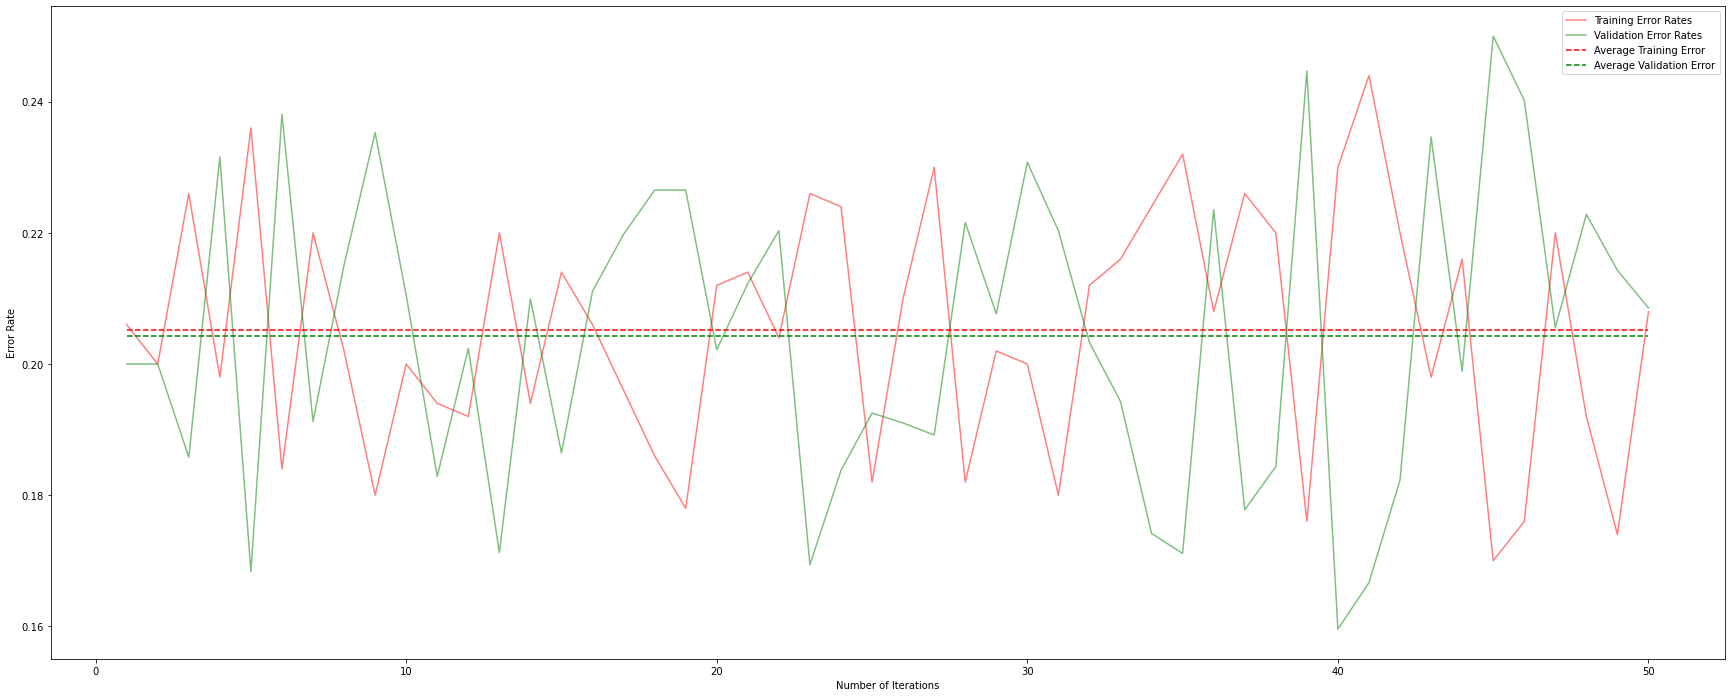

In [126]:
avg_train_error = [sum(bagging_vals_11['Train Error']) / bagging_vals_11.shape[0]] * bagging_vals_11.shape[0]
avg_val_error = [sum(bagging_vals_11['Validation Error']) / bagging_vals_11.shape[0]] * bagging_vals_11.shape[0]

plt.figure(figsize = (30, 12))
plt.plot(list(range(1, bagging_vals_11.shape[0] + 1)), bagging_vals_11['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_11.shape[0] + 1)), bagging_vals_11['Validation Error'], color = 'green', label = 'Validation Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_11.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, bagging_vals_11.shape[0] + 1)), avg_val_error, 'g--', label = 'Average Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

### Deeper tree and letter data

In [127]:
train_data_12 = train_data_12.iloc[:, :ncols1]
test_data_12 = test_data_12.iloc[:, :ncols1]
bagging_vals_12 = create_bagging(train_data_12, 50, False, depth = 10)

In [128]:
yp = predict_bagging(train_data_12, bagging_vals_12)
print('Training accuracy: ' + str(sum(list(yp == train_data_12['Y'])) / train_data_12.shape[0]))

Training accuracy: 1.0


In [129]:
yp = predict_bagging(test_data_12, bagging_vals_12)
print('Test accuracy: ' + str(sum(list(yp == test_data_12['Y'])) / test_data_12.shape[0]))

Test accuracy: 0.931615460852329


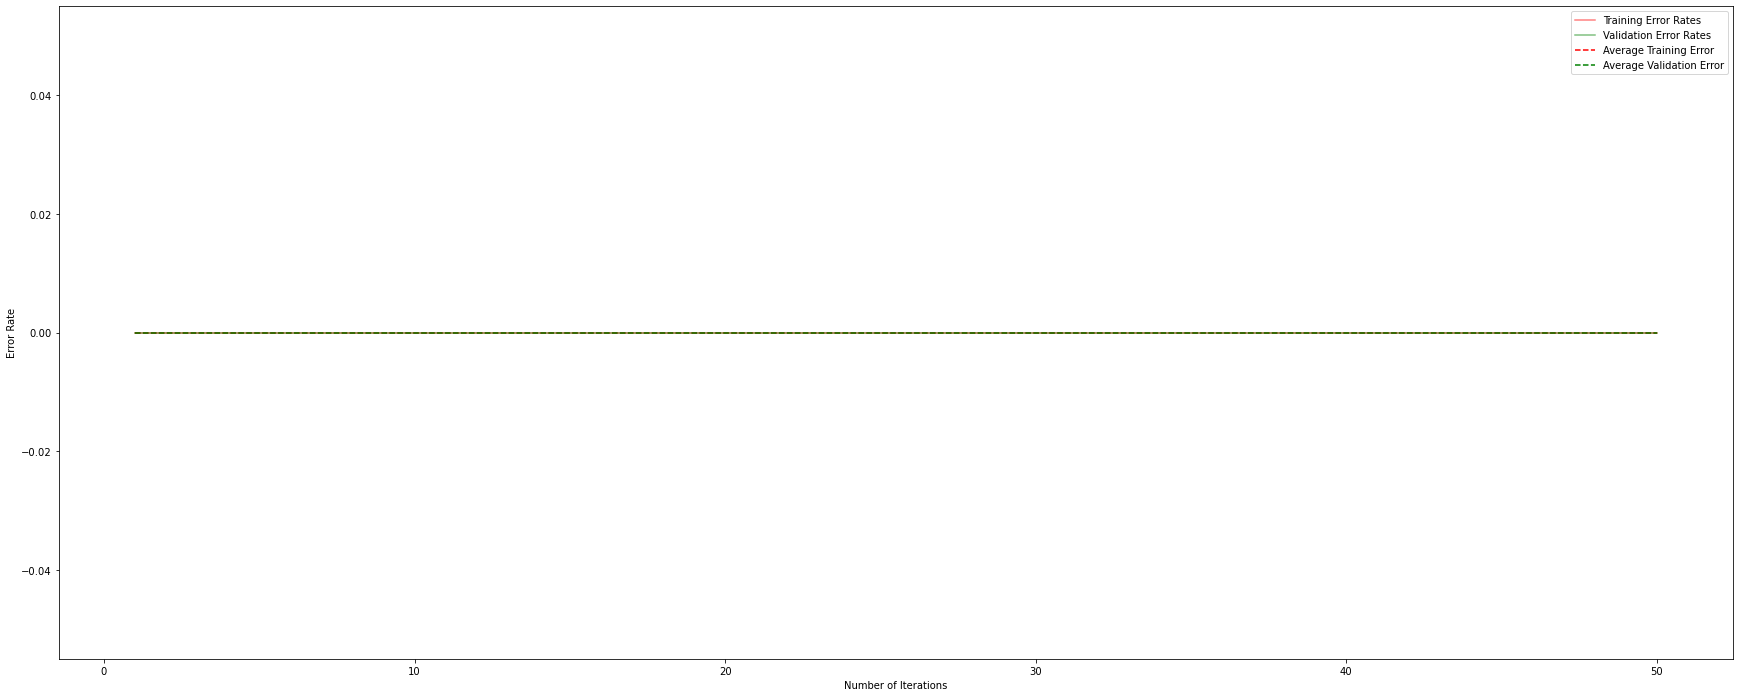

In [130]:
avg_train_error = [sum(bagging_vals_12['Train Error']) / bagging_vals_12.shape[0]] * bagging_vals_12.shape[0]
avg_val_error = [sum(bagging_vals_12['Validation Error']) / bagging_vals_12.shape[0]] * bagging_vals_12.shape[0]

plt.figure(figsize = (30, 12))
plt.plot(list(range(1, bagging_vals_12.shape[0] + 1)), bagging_vals_12['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_12.shape[0] + 1)), bagging_vals_12['Validation Error'], color = 'green', label = 'Validation Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_12.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, bagging_vals_12.shape[0] + 1)), avg_val_error, 'g--', label = 'Average Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

### Stump with credit data

In [131]:
train_data_21 = train_data_21.iloc[:, :ncols2]
test_data_21 = test_data_21.iloc[:, :ncols2]
bagging_vals_21 = create_bagging(train_data_21, 100, True)

In [132]:
yp = predict_bagging(train_data_21, bagging_vals_21)
print('Training accuracy: ' + str(sum(list(yp == train_data_21['Y'])) / train_data_21.shape[0]))

Training accuracy: 0.7


In [133]:
yp = predict_bagging(test_data_21, bagging_vals_21)
print('Test accuracy: ' + str(sum(list(yp == test_data_21['Y'])) / test_data_21.shape[0]))

Test accuracy: 0.7


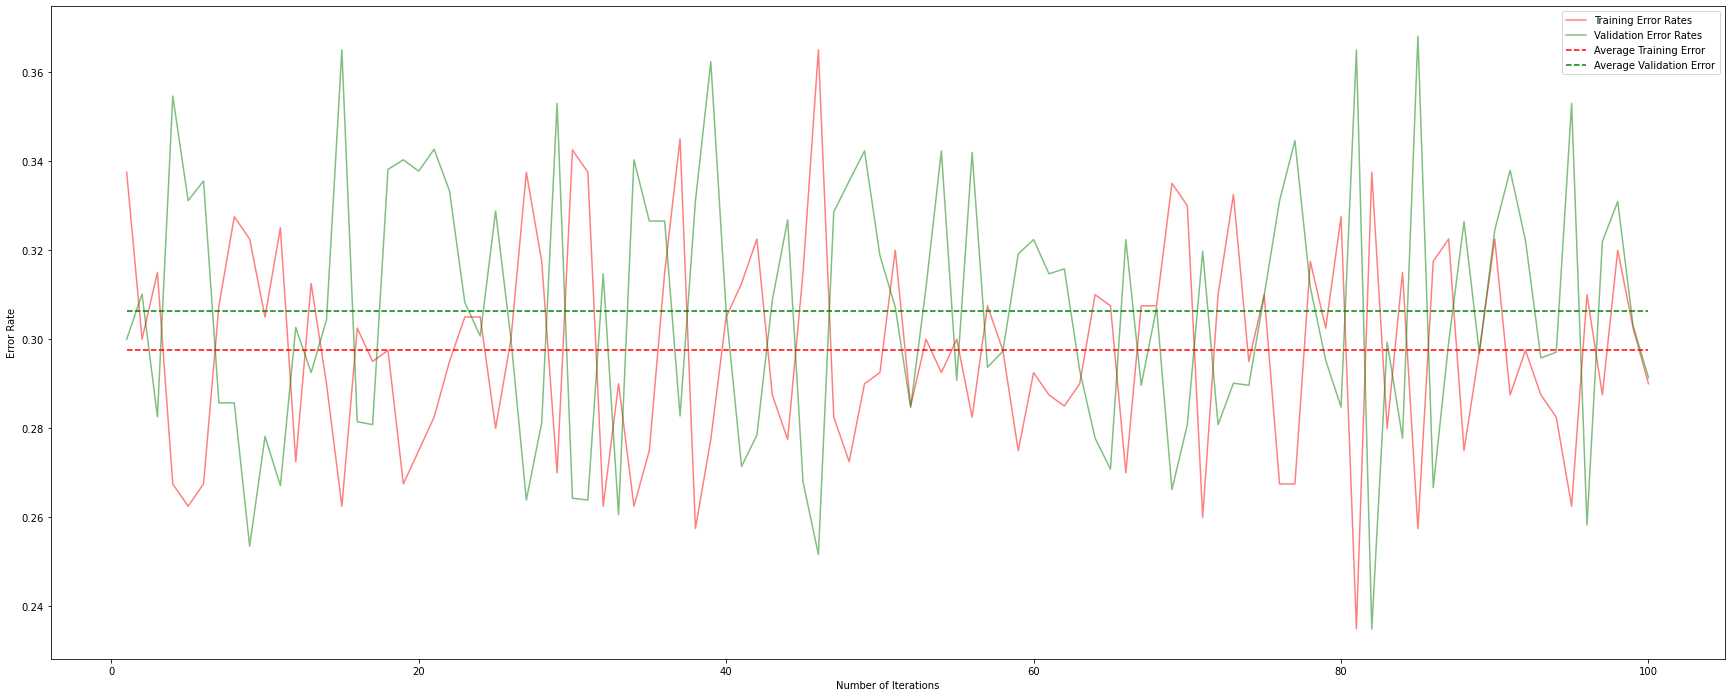

In [134]:
avg_train_error = [sum(bagging_vals_21['Train Error']) / bagging_vals_21.shape[0]] * bagging_vals_21.shape[0]
avg_val_error = [sum(bagging_vals_21['Validation Error']) / bagging_vals_21.shape[0]] * bagging_vals_21.shape[0]

plt.figure(figsize = (30, 12))
plt.plot(list(range(1, bagging_vals_21.shape[0] + 1)), bagging_vals_21['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_21.shape[0] + 1)), bagging_vals_21['Validation Error'], color = 'green', label = 'Validation Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_21.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, bagging_vals_21.shape[0] + 1)), avg_val_error, 'g--', label = 'Average Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

### Deeper tree with credit data

In [135]:
train_data_22 = train_data_22.iloc[:, :ncols2]
test_data_22 = test_data_22.iloc[:, :ncols2]
bagging_vals_22 = create_bagging(train_data_22, 100, False, depth = 10)

In [136]:
yp = predict_bagging(train_data_22, bagging_vals_22)
print('Training accuracy: ' + str(sum(list(yp == train_data_22['Y'])) / train_data_22.shape[0]))

Training accuracy: 0.9675


In [137]:
yp = predict_bagging(test_data_22, bagging_vals_22)
print('test accuracy: ' + str(sum(list(yp == test_data_22['Y'])) / test_data_22.shape[0]))

test accuracy: 0.5616666666666666


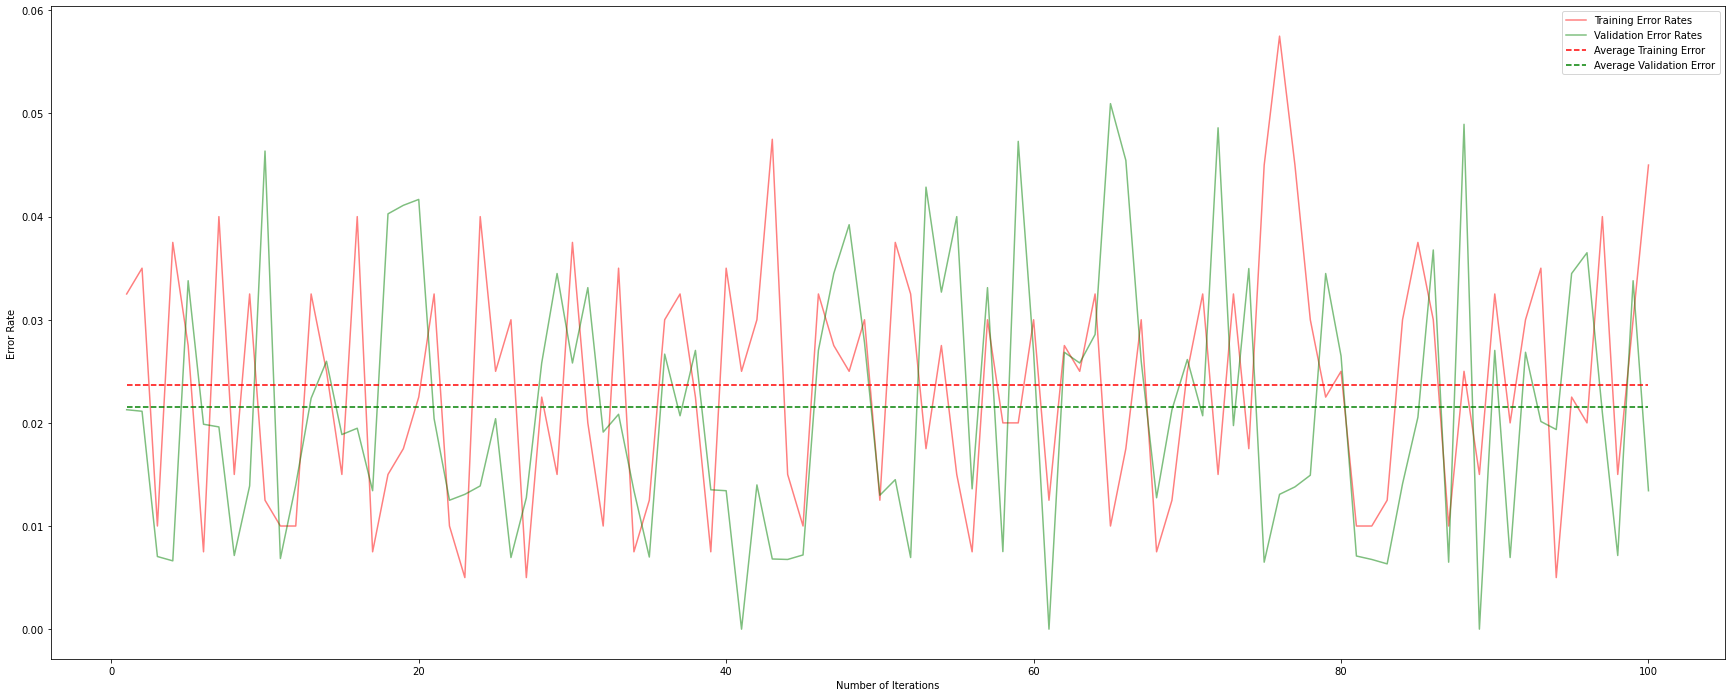

In [138]:
avg_train_error = [sum(bagging_vals_22['Train Error']) / bagging_vals_22.shape[0]] * bagging_vals_22.shape[0]
avg_val_error = [sum(bagging_vals_22['Validation Error']) / bagging_vals_22.shape[0]] * bagging_vals_22.shape[0]

plt.figure(figsize = (30, 12))
plt.plot(list(range(1, bagging_vals_22.shape[0] + 1)), bagging_vals_22['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_22.shape[0] + 1)), bagging_vals_22['Validation Error'], color = 'green', label = 'Validation Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_22.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, bagging_vals_22.shape[0] + 1)), avg_val_error, 'g--', label = 'Average Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

### Stump with spam data

In [139]:
train_data_31 = train_data_31.iloc[:, :ncols3]
test_data_31 = test_data_31.iloc[:, :ncols3]
bagging_vals_31 = create_bagging(train_data_31, 50, True)

In [140]:
yp = predict_bagging(train_data_31, bagging_vals_31)
print('Training accuracy: ' + str(sum(list(yp == train_data_31['Y'])) / train_data_31.shape[0]))

Training accuracy: 0.806


In [141]:
yp = predict_bagging(test_data_31, bagging_vals_31)
print('Test accuracy: ' + str(sum(list(yp == test_data_31['Y'])) / test_data_31.shape[0]))

Test accuracy: 0.789780616495418


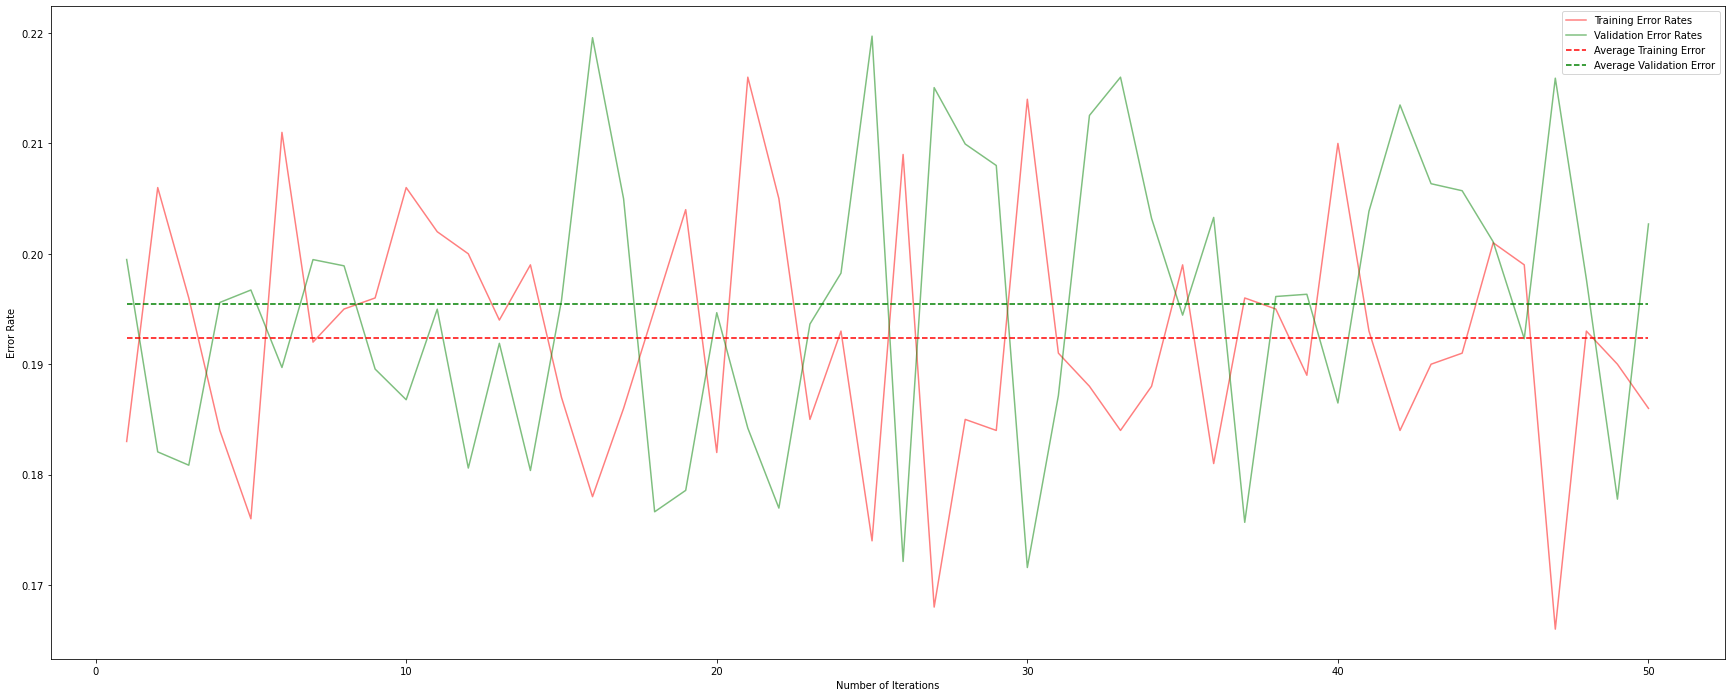

In [142]:
avg_train_error = [sum(bagging_vals_31['Train Error']) / bagging_vals_31.shape[0]] * bagging_vals_31.shape[0]
avg_val_error = [sum(bagging_vals_31['Validation Error']) / bagging_vals_31.shape[0]] * bagging_vals_31.shape[0]

plt.figure(figsize = (30, 12))
plt.plot(list(range(1, bagging_vals_31.shape[0] + 1)), bagging_vals_31['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_31.shape[0] + 1)), bagging_vals_31['Validation Error'], color = 'green', label = 'Validation Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_31.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, bagging_vals_31.shape[0] + 1)), avg_val_error, 'g--', label = 'Average Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

### Deeper tree with spam data

In [143]:
train_data_32 = train_data_32.iloc[:, :ncols3]
test_data_32 = test_data_32.iloc[:, :ncols3]
bagging_vals_32 = create_bagging(train_data_32, 50, True, depth = 10)

In [144]:
yp = predict_bagging(train_data_32, bagging_vals_32)
print('Training accuracy: ' + str(sum(list(yp == train_data_32['Y'])) / train_data_32.shape[0]))

Training accuracy: 0.792


In [145]:
yp = predict_bagging(test_data_32, bagging_vals_32)
print('Test accuracy: ' + str(sum(list(yp == test_data_32['Y'])) / test_data_32.shape[0]))

Test accuracy: 0.7936684254373785


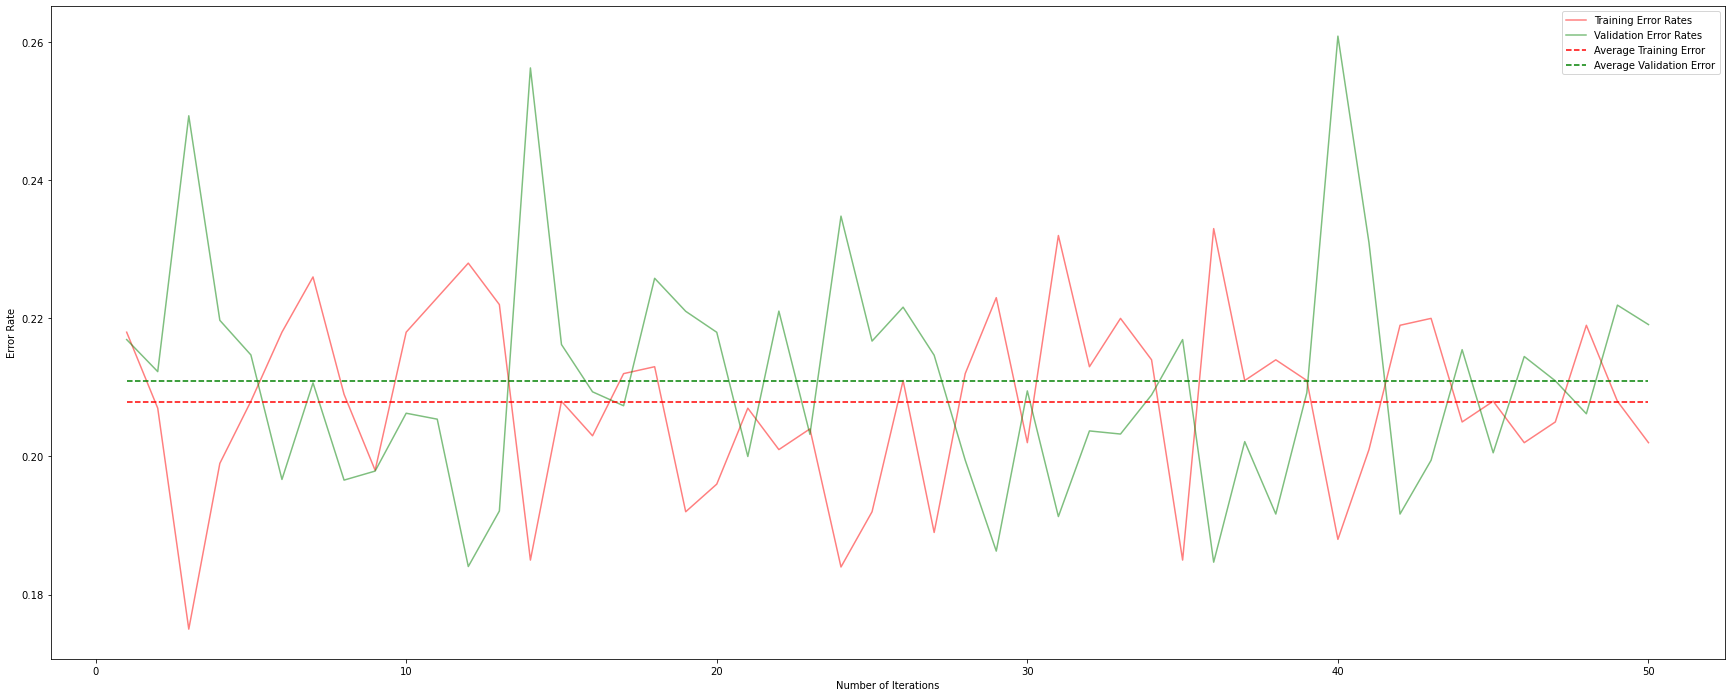

In [146]:
avg_train_error = [sum(bagging_vals_32['Train Error']) / bagging_vals_32.shape[0]] * bagging_vals_32.shape[0]
avg_val_error = [sum(bagging_vals_32['Validation Error']) / bagging_vals_32.shape[0]] * bagging_vals_32.shape[0]

plt.figure(figsize = (30, 12))
plt.plot(list(range(1, bagging_vals_32.shape[0] + 1)), bagging_vals_32['Train Error'], color = 'red', label = 'Training Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_32.shape[0] + 1)), bagging_vals_32['Validation Error'], color = 'green', label = 'Validation Error Rates', alpha = 0.5)
plt.plot(list(range(1, bagging_vals_32.shape[0] + 1)), avg_train_error, 'r--', label = 'Average Training Error')
plt.plot(list(range(1, bagging_vals_32.shape[0] + 1)), avg_val_error, 'g--', label = 'Average Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

## Summary of Experiments on Bagging
\
The following experiments were done to evaluate the performance of the Bagging classifier:
#
1. The *Letters* dataset with decision stumps:
- The entire dataset was used, with 500 samples used for training and 1009 for testing. 
- A decision stump was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50.
- The average training error is around 0.22, and the average validation error is around 0.22 as well.
- The final test accuracy is around 78% <br>
The algorith does reasonably well, but further tuning can improve the performance.
#
2. The *Letters* dataset with deeper trees:
- The entire dataset was used, with 500 samples used for training and 1009 for testing.
- A decision tree with a maximum depth of 10 was used as the base classifier.
- The maximum number of base classifiers for the ensemble was set to 50.
- Both the average training error and average validation error are around 0.02.
- The final test accuracy is around 91% <br>
Using deeper trees instead of stumps significantly increases the test accuracy.
#
3. The *Credit* dataset with decision stumps:
- The entire dataset was used, with 400 samples used for training and 600 for testing. 
- A decision stump was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 100.
- The average training error and average validation error values are around 0.3.
- The best case test accuracy was around 70% <br>
The results obtained are better than Adaboost, but could still be improved.
#
4. The *Credit* dataset with deeper trees:
- The entire dataset was used, with 400 samples used for training and 600 for testing. 
- A decision tree with a maximum depth of 10 was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 100.
- The average training error and average validation error is around 0.01.
- It is observed that the training accuracy is fairly high but the final test accuracy is very poor - only around 60%<br>
The algorithm does not perform well for this data. The training accuracy is very hight but the model does not do well when predicting new samples.<br>More preprocessing and feature engineering may be able to improve these results, but currently the model is hugely overfitting on the data.
#
5. The *Spam* dataset with decision stumps:
- The entire dataset was used, with 1000 samples used for training and 3601 for testing. 
- A decision stump was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50.
- Both the average training error and average validation error are around 0.19.
- The final test accuracy is around 78% <br>
The performance is decent but worse than the Adaboost results. Performance can be improved
#
6. The *Spam* dataset with decision stumps:
- The entire dataset was used, with 1000 samples used for training and 3601 for testing. 
- A decision stump was used as the base classifier for the model.
- The maximum number of base classifiers for the ensemble was set to 50.
- Both the average training error and average validation error are around between 0.2 and 0.21.
- The final test accuracy is around 78% <br>
The performance is decent but worse than the Adaboost results. Performance can be improved.<br><br>
Except for the credit dataset, the algorithm performs reasonably well, even with a decision stump as the base classifier.<br>It can be observed that for for two out of the three datasets, using deeper trees did not improve on the performance of decision stumps.<br>For the experiments performed, the error plots are provided above, with the execution of the algorithm.